# **Time Series**

In [1]:
!pip install statsmodels pmdarima
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
df = pd.read_csv('../data/processed/Madrid_pollutants.csv')
clean_df = pd.read_csv('../data/processed/clean_madrid.csv')

In [3]:
clean_df.shape

(53931, 8)

In [4]:
df.shape

(53931, 34)

In [6]:
# Supongamos que tienes un DataFrame df1 y has eliminado una columna llamada 'columna_eliminada' Puedes recuperar la columna eliminada de df1 de la siguiente manera
columna_recuperada = df['FECHA']

# Luego, supongamos que tienes otro DataFrame df2 al que deseas agregar la columna recuperada
# Puedes agregarla usando la función concat de pandas
clean_df['FECHA'] = columna_recuperada

# Ahora, df2 contiene la columna recuperada de df1 como 'columna_nueva'

In [7]:
clean_df.head()

,N_MUNICIPIO,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,MEDIA_DIARIA,PELIGROSIDAD,FECHA
0,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.045833,Baja,2022-01-01
1,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,0.966667,Baja,2022-01-02
2,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.175000,Baja,2022-01-03
3,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.087500,Baja,2022-01-04
4,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,0.429167,Baja,2022-01-05


In [8]:
clean_df['FECHA']= pd.to_datetime(clean_df.FECHA)
clean_df = clean_df.set_index('FECHA')
ts_df = clean_df ['MEDIA_DIARIA']
ts_df.head()

FECHA
2022-01-01    1.045833
2022-01-02    0.966667
2022-01-03    1.175000
2022-01-04    1.087500
2022-01-05    0.429167
Name: MEDIA_DIARIA, dtype: float64

In [8]:
ts_df.info

<bound method Series.info of FECHA
2022-01-01    1.045833
2022-01-02    0.966667
2022-01-03    1.175000
2022-01-04    1.087500
2022-01-05    0.429167
                ...   
2022-12-24    2.250000
2022-12-25    2.791667
2022-12-28    2.875000
2022-12-29    3.000000
2022-12-31    2.958333
Name: MEDIA_DIARIA, Length: 53931, dtype: float64>

**Values pollutants history graph**

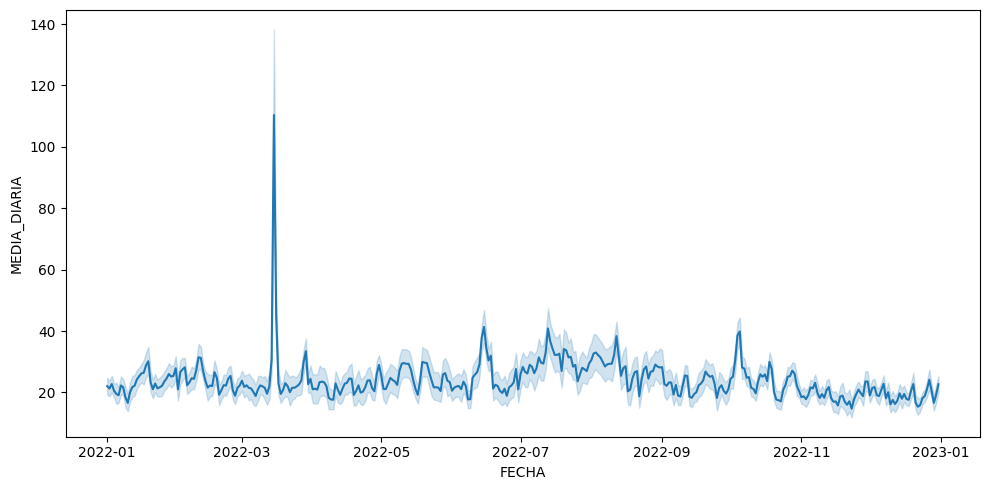

In [9]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_df)

plt.tight_layout()
plt.show()

### Comentario para explicar la grafica de arriba

### **Analysis Time Series**

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_df, period = 5)
decomposition

**Trend graph**

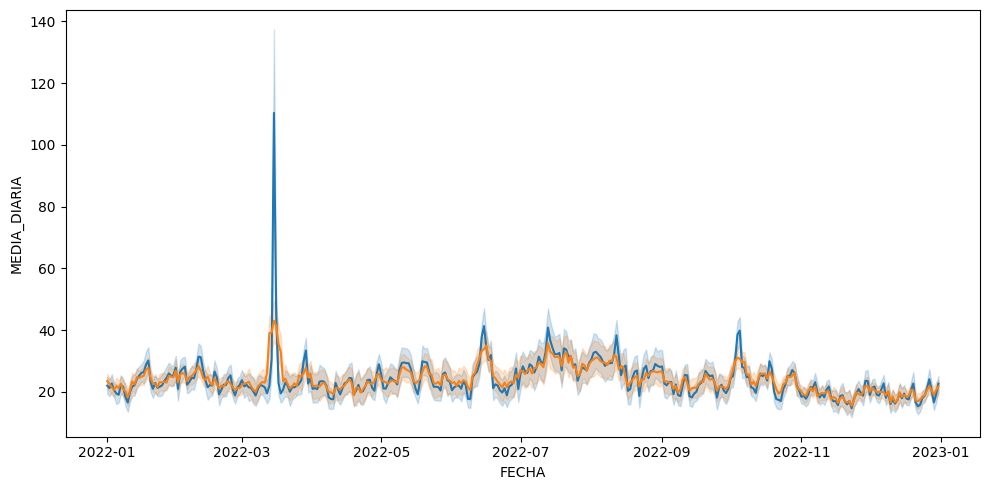

In [11]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

**Seasonal graph**

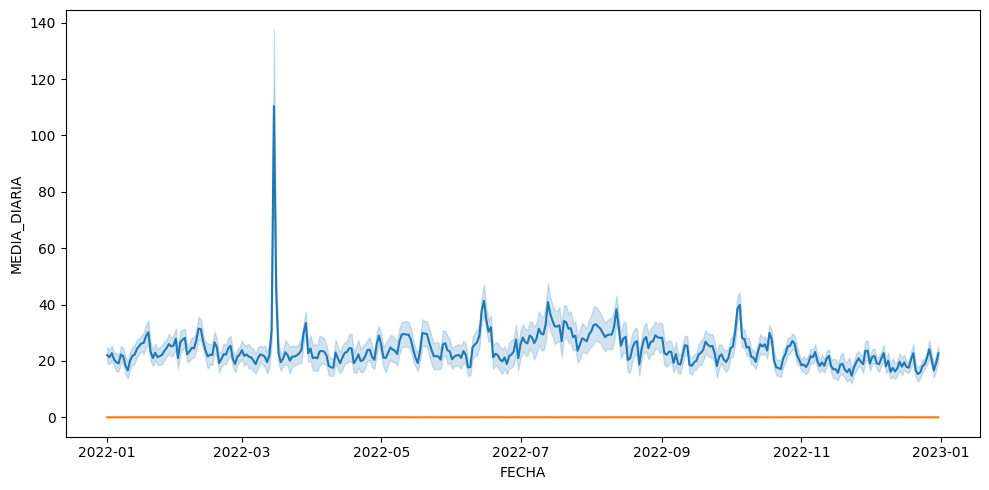

In [12]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Dickey-Fuller test results:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

test_stationarity(ts_df)

Dickey-Fuller test results:


Test Statistic                    -4.680791
p-value                            0.000091
#Lags Used                        58.000000
Number of Observations Used    53872.000000
Critical Value (1%)               -3.430471
Critical Value (5%)               -2.861594
Critical Value (10%)              -2.566799
dtype: float64

**Es estacionaria**

### **Variability analysis**

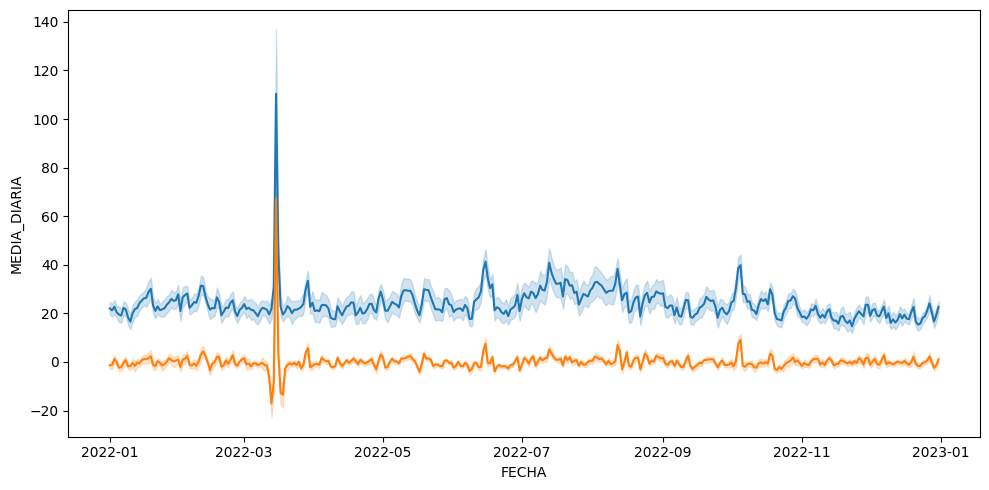

In [14]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_df)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

### **Autocorrelation analysis**

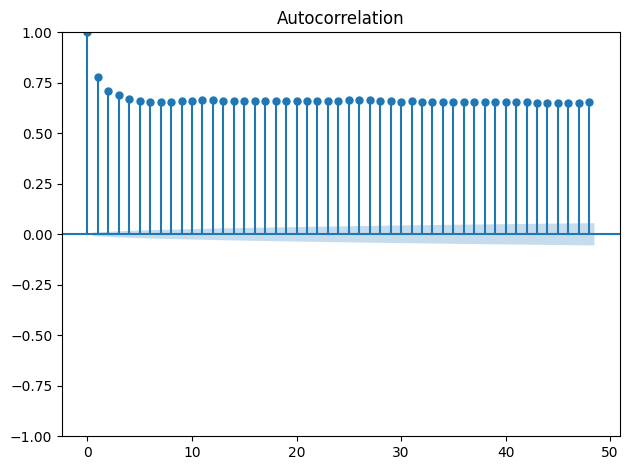

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_df)

plt.tight_layout()

plt.show()

*Ya es estacionaria, no hace falta hacer transformacion para tratarlo como tal*

In [16]:
# from pmdarima import auto_arima

# model = auto_arima(ts_df, seasonal= True, trace= True, m= 5,
#                    start_p=0, max_p=3,
#                    start_q=0, max_q=3,
#                    start_P=0, max_P=2,
#                    start_Q=0, max_Q=2,
#                    d=1, D=1,
#                    stepwise= True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=500739.057, Time=0.62 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=478014.375, Time=6.04 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=24.51 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=494377.109, Time=0.79 sec


: 

In [ ]:
# from pickle import dump

# # Save the model to a file named "arima.pk"
# dump(model, open('../models/arima.pk', 'wb'))

In [ ]:
# model.summary()

In [ ]:
# forecast = model.predict(20)
# forecast

In [ ]:
# fig, axis = plt.subplots(figsize = (10, 5))

# sns.lineplot(data = ts_df)
# sns.lineplot(data = forecast, c = "green")

# plt.tight_layout()

# plt.show()